In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from mpl_toolkits.mplot3d import axes3d
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('MA_Accord_sub.csv', low_memory=False)
df.drop(columns = ['Unnamed: 0','body_subtype','engine_measure','engine_aspiration',\
                   'speeds','interior_color','exterior_color','base_exterior_color',\
                   'base_interior_color','first_scraped_at','car_address','currency_indicator',\
                   'miles_indicator','dom_180','dom_active','msrp'],inplace = True)

In [3]:
df.columns

Index(['vin', 'price', 'miles', 'year', 'make', 'model', 'trim',
       'vehicle_type', 'body_type', 'drivetrain', 'fuel_type', 'engine',
       'engine_size', 'transmission', 'doors', 'cylinders', 'scraped_at',
       'status_date', 'dealer_id', 'street', 'city', 'state', 'zip',
       'latitude', 'longitude', 'seller_type', 'inventory_type', 'car_street',
       'car_city', 'car_state', 'car_zip', 'dom'],
      dtype='object')

In [4]:
index = []
for i in range(len(df)):
    if df['price'].iloc[i] < 50000:
        if df['state'].iloc[i] == 'MA':
            if df['miles'].iloc[i] < 200000:
                index.append(i)
df = df.iloc[index]

In [5]:
df_describe = df.describe()
df_describe.to_csv('describe.csv')

In [6]:
df.dropna(subset=['price','trim','miles'],inplace = True)
print(len(df))

157290


In [7]:
print(len(set(df['vin'])))

8293


In [8]:
df.isnull().sum()

vin                  0
price                0
miles                0
year                 0
make                 0
model                0
trim                 0
vehicle_type         0
body_type            0
drivetrain           0
fuel_type            0
engine               0
engine_size          0
transmission         0
doors                0
cylinders            0
scraped_at           0
status_date          0
dealer_id           23
street            6472
city                 0
state                0
zip                111
latitude           117
longitude          117
seller_type          0
inventory_type       0
car_street        7214
car_city           144
car_state            0
car_zip            274
dom                  1
dtype: int64

In [9]:
df.head()

vin    price    miles    year   make   model      trim  \
0  1HGCP3F87AA004843  12998.0  70027.0  2010.0  Honda  Accord        EX   
1  1HGCR2F56GA106766  19000.0  31180.0  2016.0  Honda  Accord     Sport   
2  1HGCR2F13HA142610  22888.0  12829.0  2017.0  Honda  Accord  Sport SE   
3  1HGCP2F81BA155009  13798.0  71360.0  2011.0  Honda  Accord      EX-L   
4  1HGCR2F39DA279739  15698.0  34221.0  2013.0  Honda  Accord        LX   

  vehicle_type body_type drivetrain  ...    zip latitude  longitude  \
0          Car     Sedan        FWD  ...  01581    42.27     -71.62   
1          Car     Sedan        FWD  ...  02169    42.26     -71.00   
2          Car     Sedan        FWD  ...  01581    42.26     -71.61   
3          Car     Sedan        FWD  ...  01581    42.27     -71.62   
4          Car     Sedan        FWD  ...  01581    42.27     -71.62   

  seller_type  inventory_type                      car_street      car_city  \
0      dealer            used  310 Turnpike Road, Westborough        Boston   
1      dealer            used                1575 VFW Parkway  West Roxbury   
2      dealer            used      185 Taunton Avenue, Rte 44       Seekonk   
3      dealer            used       350 Turnpike Road Route 9        Sharon   
4      dealer            used     75 Otis Street, Westborough        Boston   

   car_state  car_zip    dom  
0         MA    02134   48.0  
1         MA    02132   70.0  
2         MA    02771  262.0  
3         MA    02067   24.0  
4         MA    02134    5.0  

[5 rows x 32 columns]

In [10]:
set(df['zip'])

{'01001',
 '01001-1316',
 '01013',
 '01020',
 '01028-1824',
 '01030-2123',
 '01060',
 '01069',
 '01089',
 '01095',
 '01105',
 '01109',
 '01201',
 '01301',
 '01331',
 '01373',
 '01420',
 '01460',
 '01462',
 '01463',
 '01501',
 '01505',
 '01515',
 '01523',
 '01537',
 '01545',
 '01568-1340',
 '01580',
 '01581',
 '01601',
 '01607',
 '01610',
 '01701',
 '01702',
 '01719',
 '01752',
 '01752-3243',
 '01754',
 '01756',
 '01757',
 '01760',
 '01772',
 '01772-1708',
 '01775-1445',
 '01776',
 '01778',
 '01801',
 '01803',
 '01821-1801',
 '01830',
 '01840',
 '01843',
 '01851',
 '01867',
 '01876',
 '01901',
 '01902',
 '01905-3017',
 '01915',
 '01923',
 '01940',
 '01952',
 '01960',
 '01970',
 '02021',
 '02021-2835',
 '02025',
 '02026',
 '02032',
 '02035',
 '02043',
 '02043-1503',
 '02048',
 '02061',
 '02062',
 '02062-2625',
 '02067',
 '02072',
 '02072-3344',
 '02090',
 '02108',
 '02128',
 '02132',
 '02134',
 '02135',
 '02143',
 '02143-3401',
 '02145',
 '02148',
 '02149',
 '02150',
 '02151',
 '02155',


In [11]:
df.to_csv('MA_Honda_Accord.csv')

In [12]:
df_vinmiles = df.groupby(['vin','miles','trim']).mean()
df_vinmiles = df_vinmiles.reset_index()

In [13]:
df_vinmiles.head()

vin     miles  trim        price    year  engine_size  doors  \
0  1HGCD5631VA269997  145921.0    LX  1995.000000  1997.0          2.7    4.0   
1  1HGCF86602A001105   78347.0    VP  4550.000000  2002.0          2.3    4.0   
2  1HGCG16522A063374   62357.0    EX  5998.000000  2002.0          3.0    4.0   
3  1HGCG16532A059933  130267.0    EX  3995.000000  2002.0          3.0    4.0   
4  1HGCG1654YA099852   86872.0  EX-L  4598.666667  2000.0          3.0    4.0   

   cylinders    scraped_at   status_date     dealer_id   latitude  longitude  \
0        6.0  1.507650e+09  1.508512e+09  1.077172e+06  41.650000 -70.290000   
1        4.0  1.505867e+09  1.508421e+09  1.002080e+06  42.150000 -71.210000   
2        6.0  1.501794e+09  1.503492e+09  1.016270e+06  42.331667 -71.101667   
3        6.0  1.519425e+09  1.522278e+09  1.023148e+06  42.200000 -71.000000   
4        6.0  1.561619e+09  1.562285e+09  1.065100e+06  42.181800 -71.521900   

         dom  
0  10.000000  
1  51.500000  
2  20.000000  
3  34.000000  
4   9.666667

In [14]:
len(df_vinmiles)

12093

In [15]:
df_touring = df_vinmiles.loc[df_vinmiles['trim'] == 'Touring']
df_touring.head()

vin    miles     trim         price    year  engine_size  \
10621  1HGCR3F90DA039912  46468.0  Touring  20999.000000  2013.0          3.5   
10622  1HGCR3F90DA039912  46470.0  Touring  17888.000000  2013.0          3.5   
10623  1HGCR3F90DA039912  54526.0  Touring  18222.000000  2013.0          3.5   
10624  1HGCR3F90FA017394  46460.0  Touring  18131.086957  2015.0          3.5   
10625  1HGCR3F90GA018109   8925.0  Touring  26999.000000  2016.0          3.5   

       doors  cylinders    scraped_at   status_date     dealer_id   latitude  \
10621    4.0        6.0  1.484991e+09  1.487109e+09  1.007986e+06  42.100000   
10622    4.0        6.0  1.487254e+09  1.488310e+09  1.007986e+06  42.100000   
10623    4.0        6.0  1.495576e+09  1.496668e+09  1.007986e+06  42.100000   
10624    4.0        6.0  1.566255e+09  1.567590e+09  1.031976e+06  42.181987   
10625    4.0        6.0  1.478204e+09  1.480451e+09  1.007986e+06  42.100000   

       longitude         dom  
10621  -72.58000   71.000000  
10622  -72.58000   94.000000  
10623  -72.58000  107.000000  
10624  -71.17583   20.782609  
10625  -72.58000   27.000000

In [16]:
df_hybridtouring = df_vinmiles.loc[df_vinmiles['trim'] == 'Hybrid Touring']
df_hybridtouring.head()

vin    miles            trim         price    year  \
10817  1HGCR6F71EA007195  32350.0  Hybrid Touring  21398.000000  2014.0   
10818  1HGCR6F71EA007195  32505.0  Hybrid Touring  20855.333333  2014.0   
10819  1HGCR6F71EA007195  33053.0  Hybrid Touring  21898.000000  2014.0   
10820  1HGCR6F72EA008470  76020.0  Hybrid Touring  16000.000000  2014.0   
10821  1HGCR6F73FA003134  56914.0  Hybrid Touring  19000.000000  2015.0   

       engine_size  doors  cylinders    scraped_at   status_date  \
10817          2.0    4.0        4.0  1.494839e+09  1.495198e+09   
10818          2.0    4.0        4.0  1.497332e+09  1.498405e+09   
10819          2.0    4.0        4.0  1.500712e+09  1.501533e+09   
10820          2.0    4.0        4.0  1.567411e+09  1.568131e+09   
10821          2.0    4.0        4.0  1.557881e+09  1.559280e+09   

          dealer_id   latitude  longitude     dom  
10817  1.021406e+06  42.372500 -71.062500   8.750  
10818  1.020712e+06  42.431333 -71.060000  36.800  
10819  1.027834e+06  42.366667 -71.053333  72.000  
10820  1.025193e+06  42.225450 -71.178450  38.125  
10821  1.002104e+06  42.359400 -71.150800  18.000

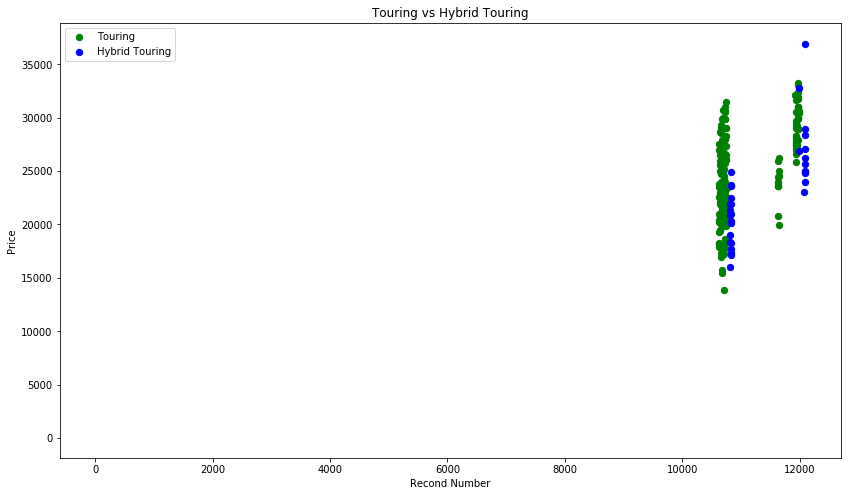

In [17]:
plt.figure(figsize=(14,8))
plt.scatter(df_touring.index, df_touring['price'], c='g', s=40)
plt.scatter(df_hybridtouring.index, df_hybridtouring['price'], c='b', s=40)
plt.xlabel('Recond Number')
plt.ylabel('Price')
plt.title('Touring vs Hybrid Touring')
plt.legend(labels = ['Touring','Hybrid Touring'],loc = 'best')
plt.plot([0.4,2],[0,0])
plt.savefig('Touring vs Hybrid Touring Scatter')

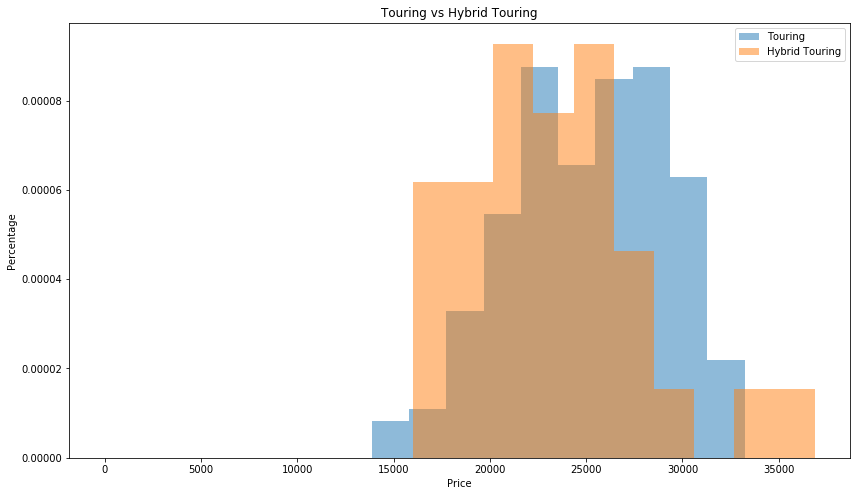

In [18]:
plt.figure(figsize=(14,8))
plt.hist(df_touring['price'], density =True, alpha = 0.5)
plt.hist(df_hybridtouring['price'], density =True, alpha = 0.5)
plt.xlabel('Price')
plt.ylabel('Percentage')
plt.title('Touring vs Hybrid Touring')
plt.legend(labels = ['Touring','Hybrid Touring'],loc = 'best')
plt.plot([0.4,2],[0,0])
plt.savefig('Touring vs Hybrid Touring Histogram')

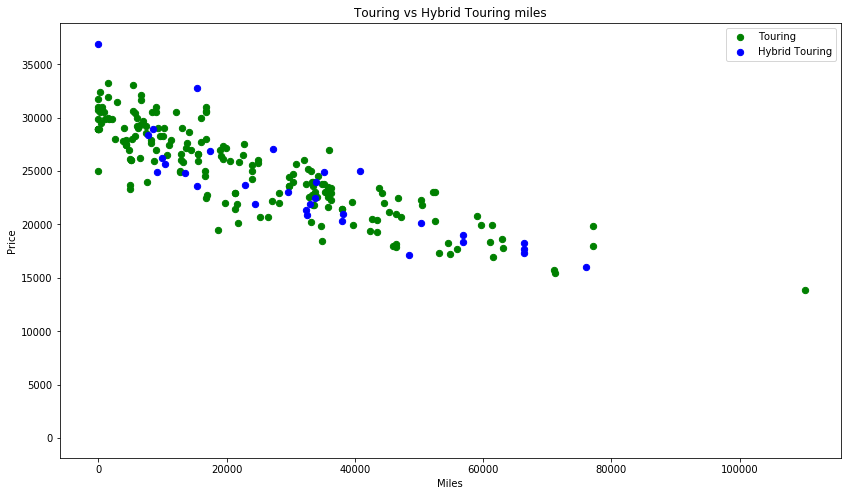

In [19]:
plt.figure(figsize=(14,8))
plt.scatter(df_touring['miles'], df_touring['price'], c='g', s=40)
plt.scatter(df_hybridtouring['miles'], df_hybridtouring['price'], c='b', s=40)
plt.xlabel('Miles')
plt.ylabel('Price')
plt.title('Touring vs Hybrid Touring miles')
plt.legend(labels = ['Touring','Hybrid Touring'],loc = 'best')
plt.plot([0.4,2],[0,0])
plt.savefig('Touring vs Hybrid Touring Scatter Miles')

In [20]:
set(df_vinmiles['trim'])

{'3.0 EX',
 '3.0 SE',
 'Base',
 'EX',
 'EX LEATHER',
 'EX Leather',
 'EX V6',
 'EX W/LEATHER',
 'EX-L',
 'EX-L V-6',
 'EX-L V6',
 'Hybrid',
 'Hybrid EX',
 'Hybrid EX-L',
 'Hybrid Touring',
 'LX',
 'LX-P',
 'LX-S',
 'LX-SE',
 'Plug-In',
 'SE',
 'Sport',
 'Sport SE',
 'Touring',
 'Touring V6',
 'VP'}

In [21]:
df_vinmileszip = df.groupby(['vin','miles','trim','zip']).mean()
df_vinmileszip = df_vinmileszip.reset_index()
df_vinmileszip

vin     miles            trim    zip    price    year  \
0      1HGCD5631VA269997  145921.0              LX  02601   1995.0  1997.0   
1      1HGCF86602A001105   78347.0              VP  02032   4550.0  2002.0   
2      1HGCG16522A063374   62357.0              EX  01760   5998.0  2002.0   
3      1HGCG16522A063374   62357.0              EX  01940   5998.0  2002.0   
4      1HGCG16522A063374   62357.0              EX  02134   5998.0  2002.0   
...                  ...       ...             ...    ...      ...     ...   
60368  JHMCR6F78HC024632    7826.0  Hybrid Touring  02460  28400.0  2017.0   
60369  JHMCR6F7XHC002504   34000.0  Hybrid Touring  01923  23998.0  2017.0   
60370  JHMCR6F7XHC002504   34000.0  Hybrid Touring  02062  23998.0  2017.0   
60371  JHMCR6F7XHC025099    9897.0  Hybrid Touring  01095  26248.0  2017.0   
60372  JHMCR6F7XHC025099   10337.0  Hybrid Touring  01095  25697.0  2017.0   

       engine_size  doors  cylinders    scraped_at   status_date  dealer_id  \
0              2.7    4.0        6.0  1.507650e+09  1.508512e+09  1077172.0   
1              2.3    4.0        4.0  1.505867e+09  1.508421e+09  1002080.0   
2              3.0    4.0        6.0  1.501808e+09  1.503519e+09  1009871.0   
3              3.0    4.0        6.0  1.501734e+09  1.503458e+09  1017921.0   
4              3.0    4.0        6.0  1.501814e+09  1.503527e+09  1029000.0   
...            ...    ...        ...           ...           ...        ...   
60368          2.0    4.0        4.0  1.525563e+09  1.527412e+09  1062792.0   
60369          2.0    4.0        4.0  1.561154e+09  1.561408e+09  1053106.0   
60370          2.0    4.0        4.0  1.560671e+09  1.561361e+09  1053183.0   
60371          2.0    4.0        4.0  1.562802e+09  1.564145e+09  1006743.0   
60372          2.0    4.0        4.0  1.562802e+09  1.565128e+09  1006743.0   

       latitude  longitude    dom  
0       41.6500   -70.2900   10.0  
1       42.1500   -71.2100   51.5  
2       42.2900   -71.3600   20.0  
3       42.5300   -71.0300   20.0  
4       42.3600   -71.1300   20.0  
...         ...        ...    ...  
60368   42.3500   -71.2000   85.5  
60369   42.5595   -70.9712  249.0  
60370   42.1706   -71.1963  248.5  
60371   42.1501   -72.4671  102.0  
60372   42.1501   -72.4671  113.0  

[60373 rows x 15 columns]

In [22]:
gas_list = ['3.0 EX','3.0 LX','3.0 SE','Base','DX','EX','EX LEATHER',\
             'EX Leather','EX V6','EX W/LEATHER','EX-L','EX-L V-6',\
             'EX-L V6','LX','LX-P','LX-S','LX-SE','SE','Sport','Sport SE',\
             'Touring','Touring V6','VP']
hybrid_list = ['Hybrid','Hybrid EX','Hybrid EX-L','Hybrid Touring','Plug-In']
gas_index = []
hybrid_index = []
for i in range(len(df_vinmileszip)):
    temp = df_vinmileszip['zip'].iloc[i]
    if len(temp) <5:
        temp = '0' + temp
        df_vinmileszip['zip'].iloc[i] = temp
    if len(temp) >5:
        temp = temp[:5]
        df_vinmileszip['zip'].iloc[i] = temp
for i in range(len(df_vinmileszip)):
    if df_vinmileszip['trim'].iloc[i] in gas_list:
        if int(df_vinmileszip['price'].iloc[i]) < 50000:
            gas_index.append(i)
    else:
        if int(df_vinmileszip['price'].iloc[i]) < 50000:
            hybrid_index.append(i)
df_gas = df_vinmileszip.iloc[gas_index]
df_hybrid = df_vinmileszip.iloc[hybrid_index]

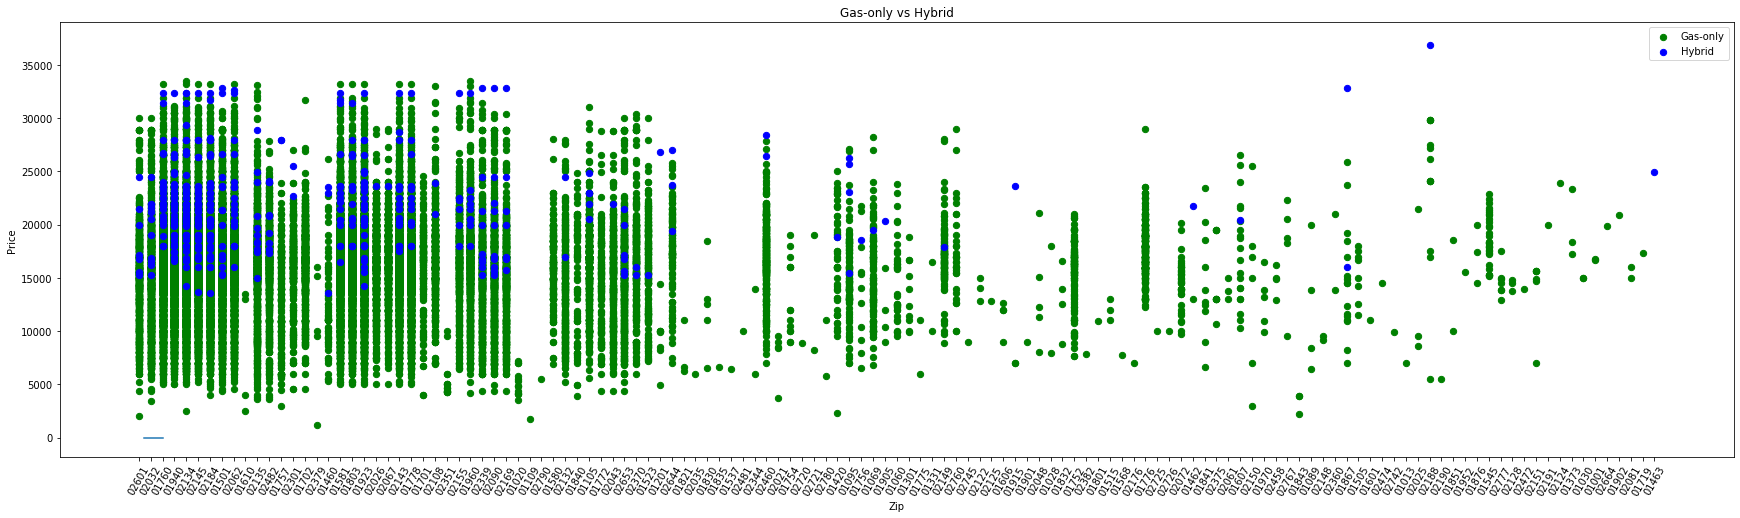

In [23]:
plt.figure(figsize=(30,8))
plt.scatter(df_gas['zip'], df_gas['price'], c='g', s=40)
plt.scatter(df_hybrid['zip'], df_hybrid['price'], c='b', s=40)
plt.xlabel('Zip')
plt.xticks(rotation=60)
plt.ylabel('Price')
plt.title('Gas-only vs Hybrid')
plt.legend(labels = ['Gas-only','Hybrid'],loc = 'best')
plt.plot([0.4,2],[0,0])
plt.savefig('Gas-only vs Hybrid Scatter',dpi=300)

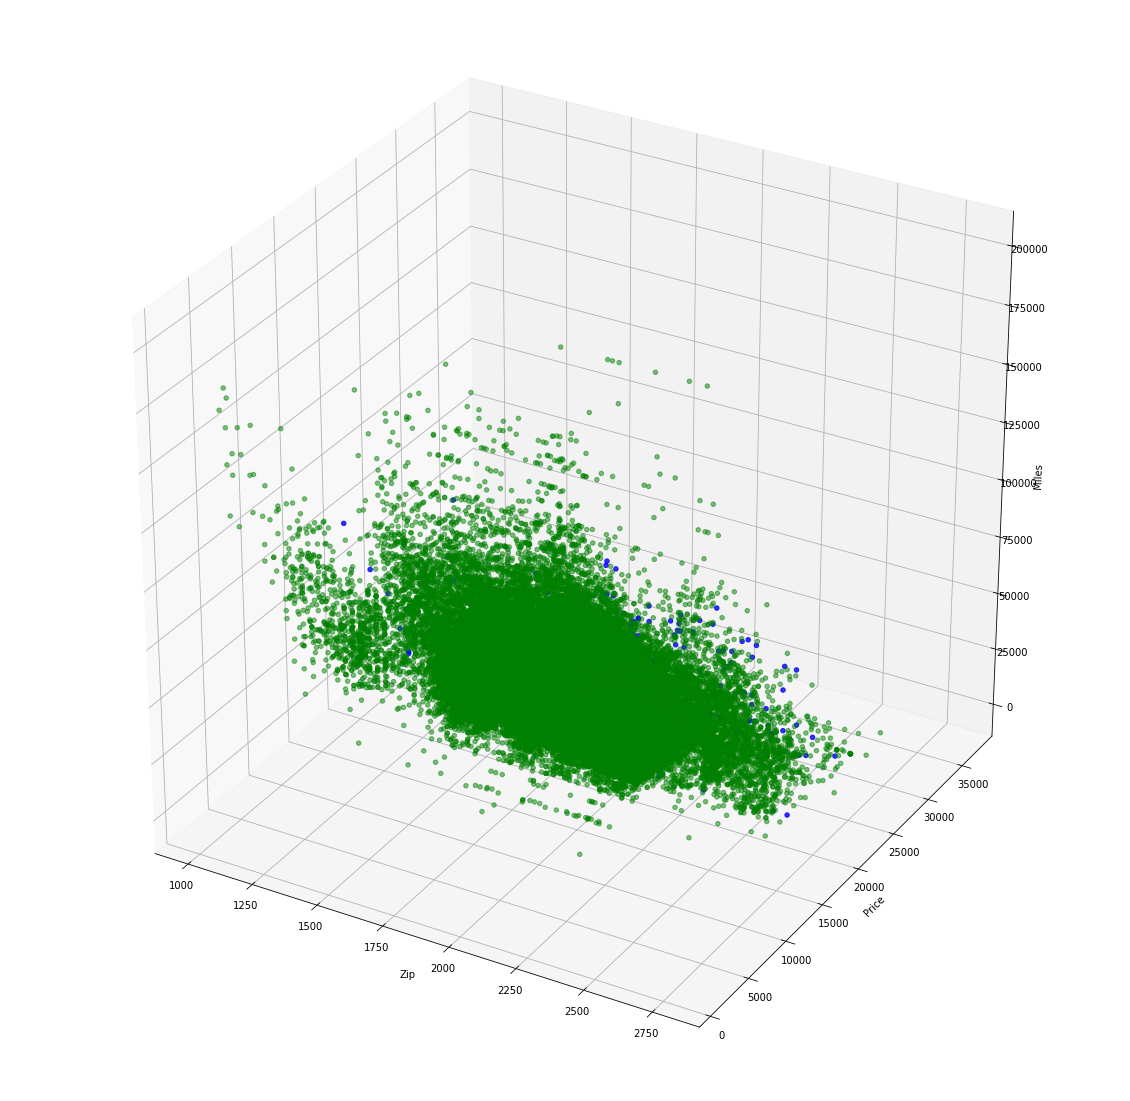

In [24]:
fig = plt.figure(figsize=(20,20))
ax = plt.axes(projection="3d")
z_points = df_gas['miles']
x_points = df_gas['zip'].astype(int)
y_points = df_gas['price']
x = df_hybrid['zip'].astype(int)
y = df_hybrid['price']
z = df_hybrid['miles']
ax.set_xlabel('Zip')
ax.set_ylabel('Price')
ax.set_zlabel('Miles')
ax.scatter3D(x_points, y_points, z_points, c='g', alpha = 0.5);
ax.scatter3D(x, y, z, c='b',alpha = 0.8);
plt.savefig('Zip vs Price vs Miles 3D')

In [25]:
import plotly.graph_objects as go

In [26]:
fig = go.Figure()

fig.add_trace(go.Scatter3d(
    x=df_gas['zip'].astype(int),
    y=df_gas['price'],
    z=df_gas['miles'],
    name='Gas-only',
    mode='markers',
    marker=dict(
        size=2,    
        color = 'blue',
        opacity=0.6
    )
))

fig.add_trace(go.Scatter3d(
    x=df_hybrid['zip'].astype(int),
    y=df_hybrid['price'],
    z=df_hybrid['miles'],
    name='Hybrid',
    mode='markers',
    marker=dict(
        size=2, 
        color = 'green',
        opacity=0.8
    )
))


# tight layout
fig.update_layout(title='Zip vs Price vs Miles',\
                  scene= dict(xaxis_title = 'Zip',\
                  yaxis_title = 'Price',\
                  zaxis_title = 'Miles'),\
                  font=dict(family="Courier New, monospace",size=14,color="#7f7f7f"),
                  margin=dict(l=0, r=0, b=0, t=0))
fig.show()

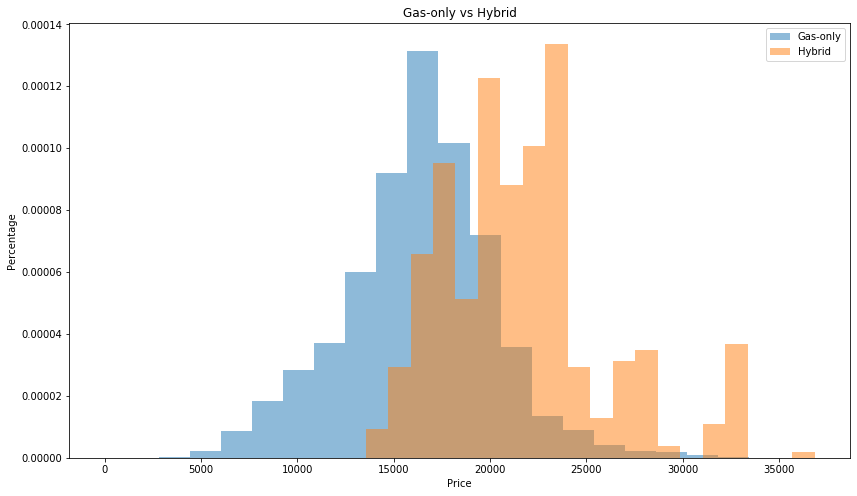

In [27]:
plt.figure(figsize=(14,8))
plt.hist(df_gas['price'], bins = 20, density =True, alpha = 0.5)
plt.hist(df_hybrid['price'],  bins = 20, density = True, alpha = 0.5)
plt.xlabel('Price')
plt.ylabel('Percentage')
plt.title('Gas-only vs Hybrid')
plt.legend(labels = ['Gas-only','Hybrid'],loc = 'best')
plt.plot([0.4,2],[0,0])
plt.savefig('Gas-only vs Hybrid Hist')

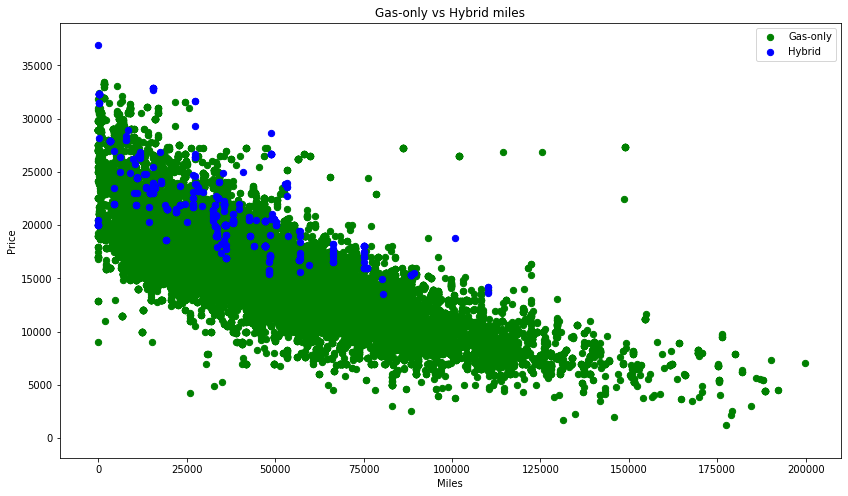

In [28]:
plt.figure(figsize=(14,8))
plt.scatter(df_gas['miles'], df_gas['price'], c='g', s=40)
plt.scatter(df_hybrid['miles'], df_hybrid['price'], c='b', s=40)
plt.xlabel('Miles')
plt.ylabel('Price')
plt.title('Gas-only vs Hybrid miles')
plt.legend(labels = ['Gas-only','Hybrid'],loc = 'best')
plt.plot([0.4,2],[0,0])
plt.savefig('Gas-only vs Hybrid Scatter Miles')

In [29]:
temp = df_vinmiles.loc[df_vinmiles['vin'] == '1HGCR2F13HA142610']
temp

vin    miles      trim         price    year  engine_size  \
2640  1HGCR2F13HA142610  12814.0  Sport SE  25438.000000  2017.0          2.4   
2641  1HGCR2F13HA142610  12829.0  Sport SE  22585.617886  2017.0          2.4   

      doors  cylinders    scraped_at   status_date     dealer_id   latitude  \
2640    4.0        4.0  1.525548e+09  1.527825e+09  1.015155e+06  42.500000   
2641    4.0        4.0  1.530667e+09  1.533251e+09  1.023352e+06  42.352276   

      longitude        dom  
2640 -71.200000  194.00000  
2641 -71.218862  257.52439

In [30]:
index = []
for i in range(len(df_vinmileszip)):
    if int(df_vinmileszip['zip'].iloc[i]) <= 1500:
        if int(df_vinmileszip['zip'].iloc[i]) > 1250:
            index.append(i)
df_1250_1500 = df_vinmileszip.iloc[index]
df_1250_1500.head()

vin     miles trim    zip        price    year  \
29   1HGCG6677XA099583   34861.0   EX  01460  5297.500000  1999.0   
379  1HGCM56437A123306  119861.0   LX  01460  7000.000000  2007.0   
628  1HGCM567X7A156992   77880.0   EX  01460  8598.333333  2007.0   
702  1HGCM56827A168059   82365.0   EX  01460  7497.500000  2007.0   
905  1HGCM66397A039696   71959.0   LX  01460  7495.000000  2007.0   

     engine_size  doors  cylinders    scraped_at   status_date  dealer_id  \
29           2.3    4.0        4.0  1.540002e+09  1.540259e+09  1012005.0   
379          2.4    4.0        4.0  1.471889e+09  1.472613e+09  1012005.0   
628          2.4    4.0        4.0  1.481060e+09  1.481973e+09  1012005.0   
702          2.4    4.0        4.0  1.556923e+09  1.557225e+09  1012005.0   
905          3.0    4.0        6.0  1.563752e+09  1.564606e+09  1012005.0   

     latitude  longitude        dom  
29     42.530   -71.4700   5.000000  
379    42.540   -71.4800   9.000000  
628    42.540   -71.4800  17.666667  
702    42.544   -71.4652   4.500000  
905    42.544   -71.4652  12.000000

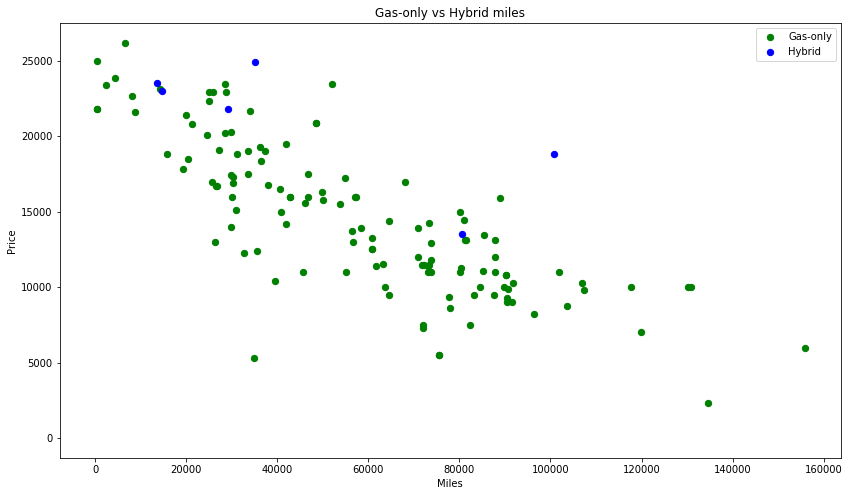

In [31]:
df_milestrim = df_1250_1500.groupby(['miles','trim']).mean()
df_milestrim = df_milestrim.reset_index()
gas_index = []
hybrid_index = []
for i in range(len(df_milestrim)):
    if df_milestrim['trim'].iloc[i] in gas_list:
        if int(df_milestrim['price'].iloc[i]) < 50000:
            gas_index.append(i)
    else:
        if int(df_milestrim['price'].iloc[i]) < 50000:
            hybrid_index.append(i)
df_gas = df_milestrim.iloc[gas_index]
df_hybrid = df_milestrim.iloc[hybrid_index]
plt.figure(figsize=(14,8))
plt.scatter(df_gas['miles'], df_gas['price'], c='g', s=40)
plt.scatter(df_hybrid['miles'], df_hybrid['price'], c='b', s=40)
plt.xlabel('Miles')
plt.ylabel('Price')
plt.title('Gas-only vs Hybrid miles')
plt.legend(labels = ['Gas-only','Hybrid'],loc = 'best')
plt.plot([0.4,2],[0,0])
plt.savefig('Same Zip Gas-only vs Hybrid Scatter Miles')